In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random 
import numpy as np

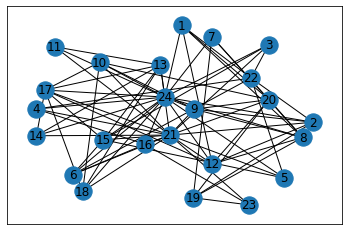

In [2]:
df=pd.read_csv('arcs.txt', sep=' ', names=['n1','n2','Weight'])
G=nx.from_pandas_edgelist(df,'n1','n2',create_using=nx.Graph)
k_pos=nx.spring_layout(G, k=2.0)
nx.draw_networkx(G,k_pos)

In [8]:
def IC(G_nx,seeds,Probability):
    for i in G_nx.nodes():
        if i in seeds:
            G_nx.nodes[i]['infected']=True
        else:
            G_nx.nodes[i]['infected']=False
        G_nx.nodes[i]['try']=False
    c=0 
    new_active=True
    while new_active:
        new_active=False
        for v in G_nx.nodes():
            if G_nx.nodes[v]['infected']==True and G_nx.nodes[v]['try']==False:
                for w in nx.neighbors(G_nx,v):
                    if G_nx.nodes[w]['infected']==False:
                        x=random.random()
                        if x<Probability:
                            G_nx.nodes[w]['infected']=True
                            new_active=True
                            c+=1
                G_nx.nodes[v]['try']=True
    return c

In [23]:
def monte_carlo(G_nx,seeds,Probability,repeats):
    sum_IC = 0
    for i in range(repeats):
        sum_IC += IC(G_nx,seeds,Probability)
    return sum_IC / repeats

def greedy_hill_climbing(G_nx,k,probability=0.1,repeats=10):
    S = set()
    N = set(G_nx.nodes())
    for i in range(k):
        max_spread = -1
        max_node = None
        for n in N-S:
            spread = monte_carlo(G_nx,S.union({n}),probability,repeats)-monte_carlo(G_nx,S,probability,repeats)
            if spread > max_spread:
                max_spread = spread
                max_node = n
                print("Max Spread:", max_spread ,"\t\t\t Max Node:",max_node)
        S.add(max_node)
    return S


In [25]:
greedy_hill_climbing(G, 3 ,0.2 , 20)

Max Spread: 4.5 			 Max Node: 1
Max Spread: 6.05 			 Max Node: 2
Max Spread: 8.55 			 Max Node: 5
Max Spread: 10.05 			 Max Node: 9
Max Spread: 0.4500000000000002 			 Max Node: 1
Max Spread: 3.45 			 Max Node: 2
Max Spread: 5.15 			 Max Node: 4
Max Spread: 5.8 			 Max Node: 6
Max Spread: 2.700000000000001 			 Max Node: 1
Max Spread: 3.0 			 Max Node: 14
Max Spread: 3.8499999999999996 			 Max Node: 17


{6, 9, 17}

In [ ]:
'''
Best Node: 24 	With gain: 11.517
S: {24}
Best Node: 19 	With gain: 1.987
S: {24, 19}
Best Node: 6 	With gain: 1.513
S: {24, 19, 6}
{6, 19, 24}
'''